<a href="https://colab.research.google.com/github/ShyamKumarChand/Collection-of-data/blob/master/XGBoostforIRISDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xgboost as xgb

In [2]:
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn import datasets
from sklearn import metrics
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
clf = XGBClassifier()

In [6]:
clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [7]:
y_pred = clf.predict(x_test)

In [8]:
import pandas as pd
pd.DataFrame({"Actual Data":y_test,
             "prediction":y_pred})

,Actual Data,prediction
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


In [9]:
Train_score = clf.score(x_train,y_train)
Train_score

1.0

In [10]:
Test_score = clf.score(x_test,y_test)
Test_score

1.0

In [11]:
print("Accuracy of model:",metrics.accuracy_score(y_test,y_pred))

Accuracy of model: 1.0


In [12]:
dtrain = xgb.DMatrix(x_train,label=y_train)
dtest = xgb.DMatrix(x_test,label=y_test)

In [13]:
dtrain

In [14]:
param = {
    "max_depth":3,
    "eta":0.3,
    "silent":1,
    "objective": 'multi:softprob',
    "num_class":3
}

In [15]:
num_round = 5

In [16]:
bst = xgb.train(param,dtrain,num_round)
bst

In [17]:
bst.dump_model('dump.raw.txt')

In [18]:
preds = bst.predict(dtest)

In [19]:
best_pred = np.asarray([np.argmax(line) for line in preds])

In [20]:
from sklearn.metrics import precision_score
print(precision_score(y_test,best_pred,average='macro'))

1.0


In [21]:
import joblib
joblib.dump(bst,'bst_model.plk',compress=True)

['bst_model.plk']

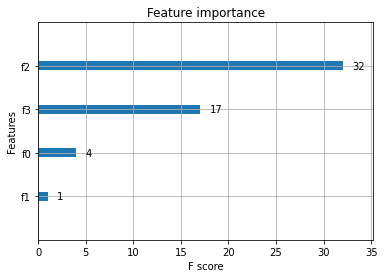

In [22]:
xgb.plot_importance(bst)

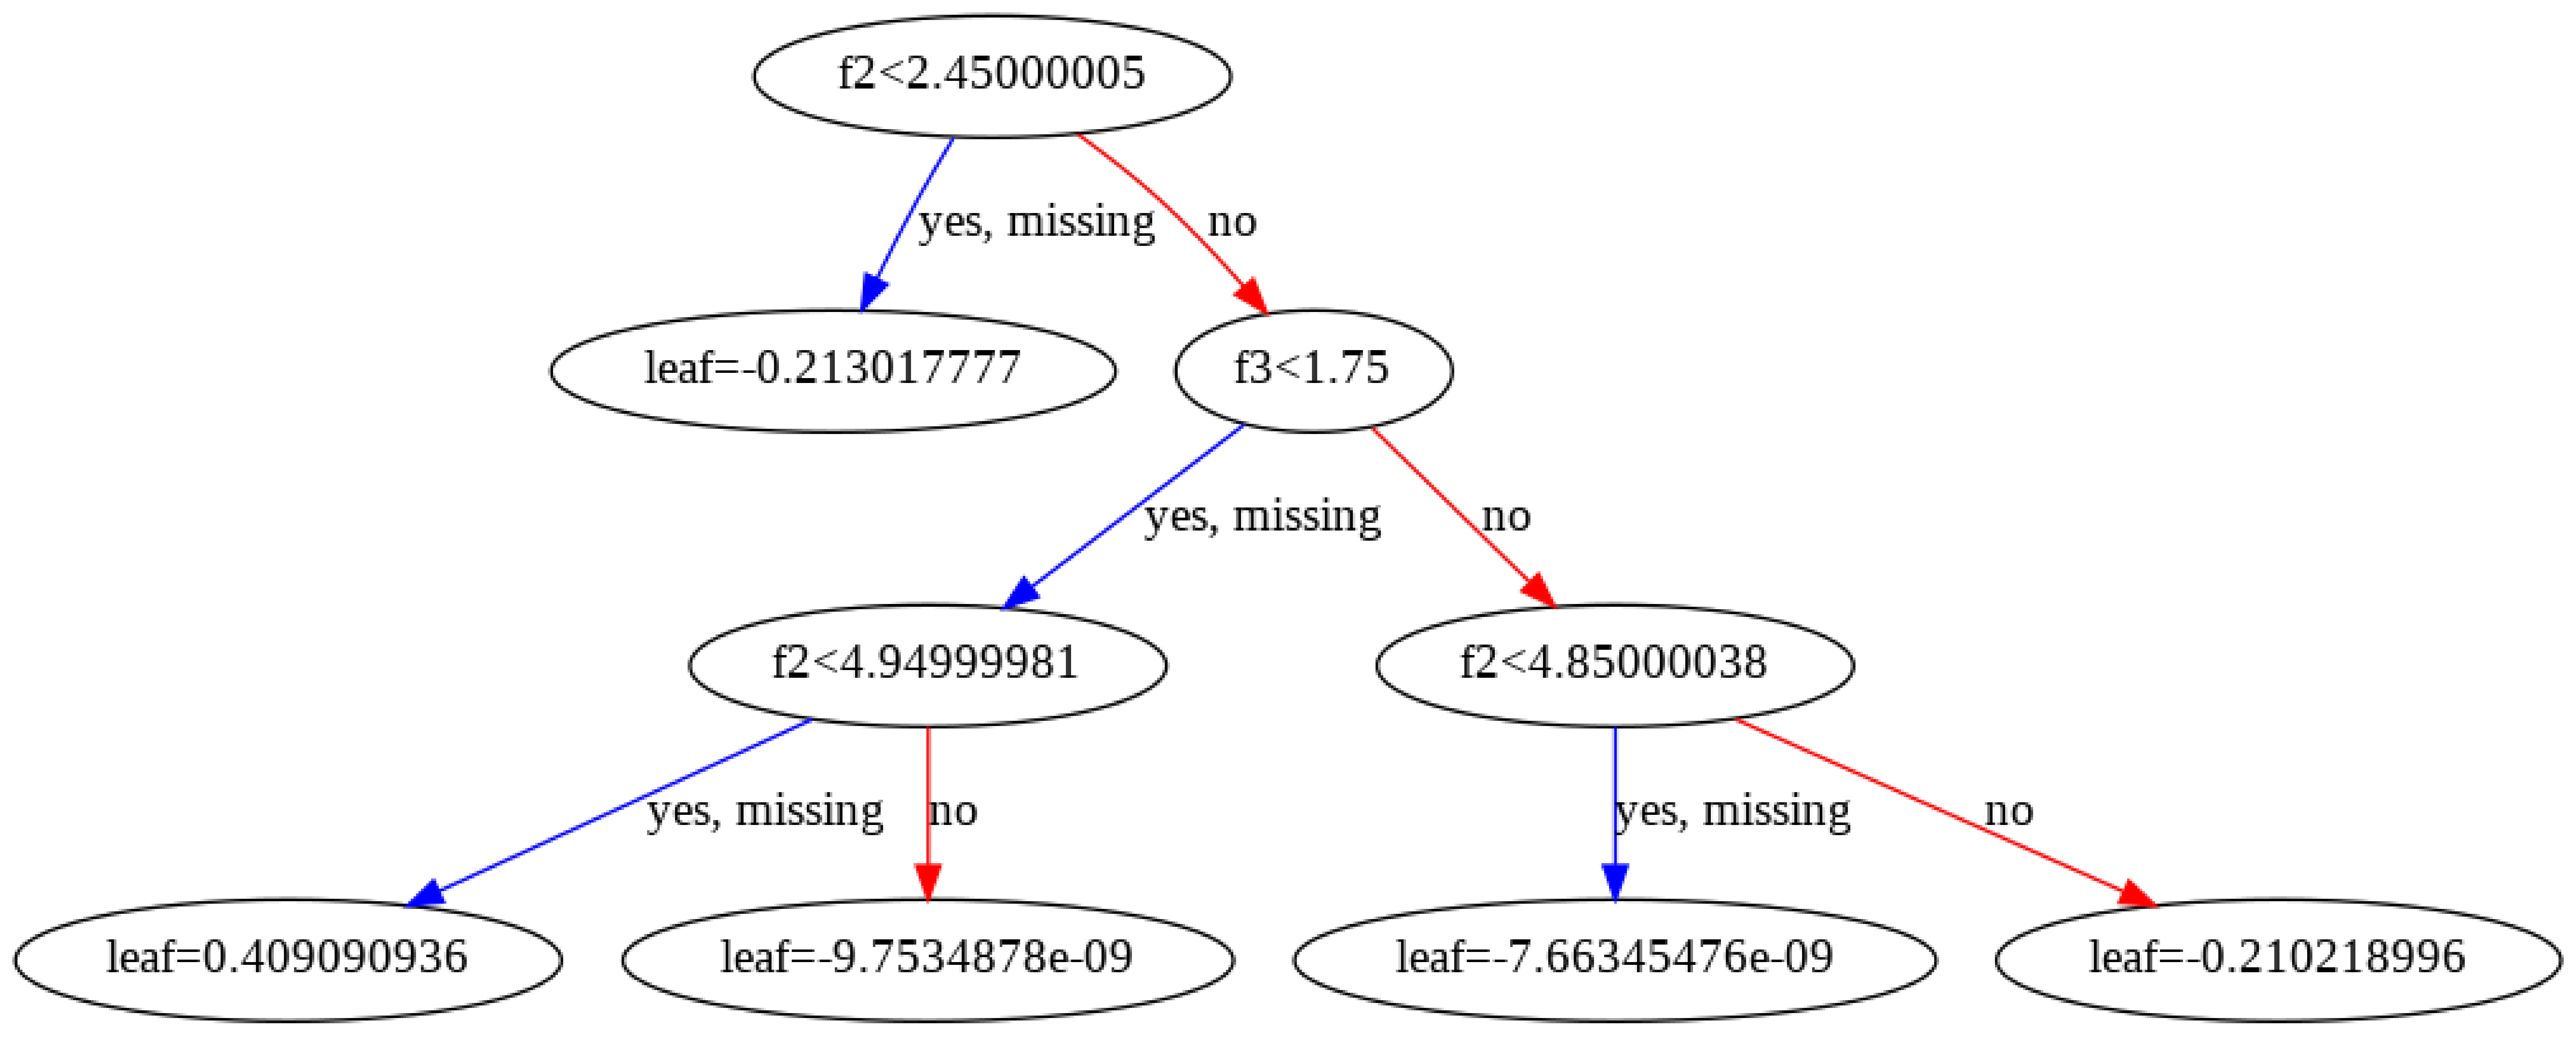

In [23]:
xgb.plot_tree(bst,num_trees=1)
fig = plt.gcf()
fig.set_size_inches(150,100)


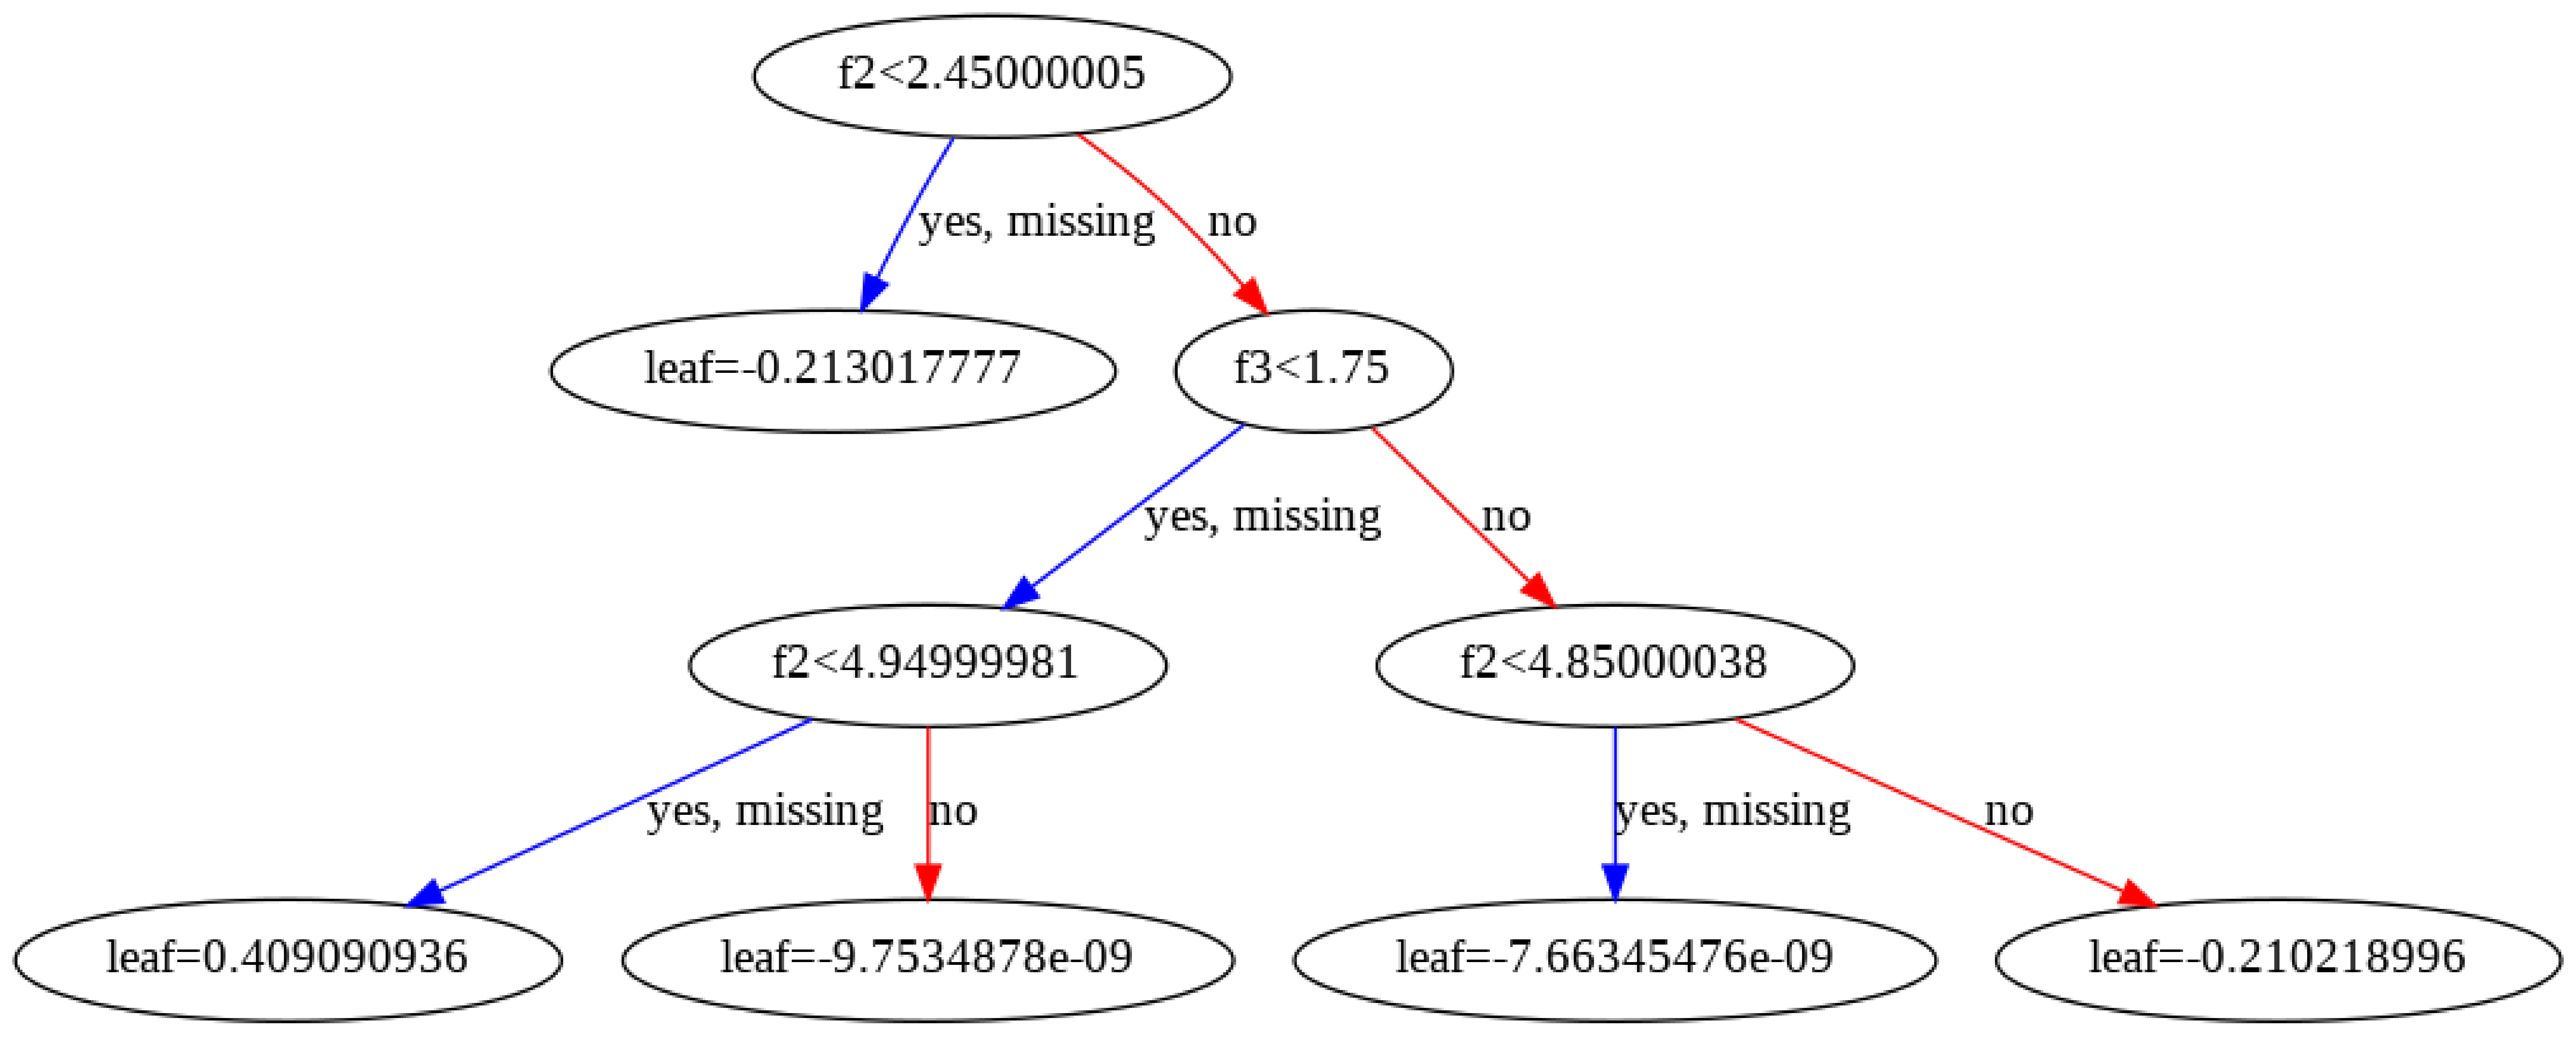

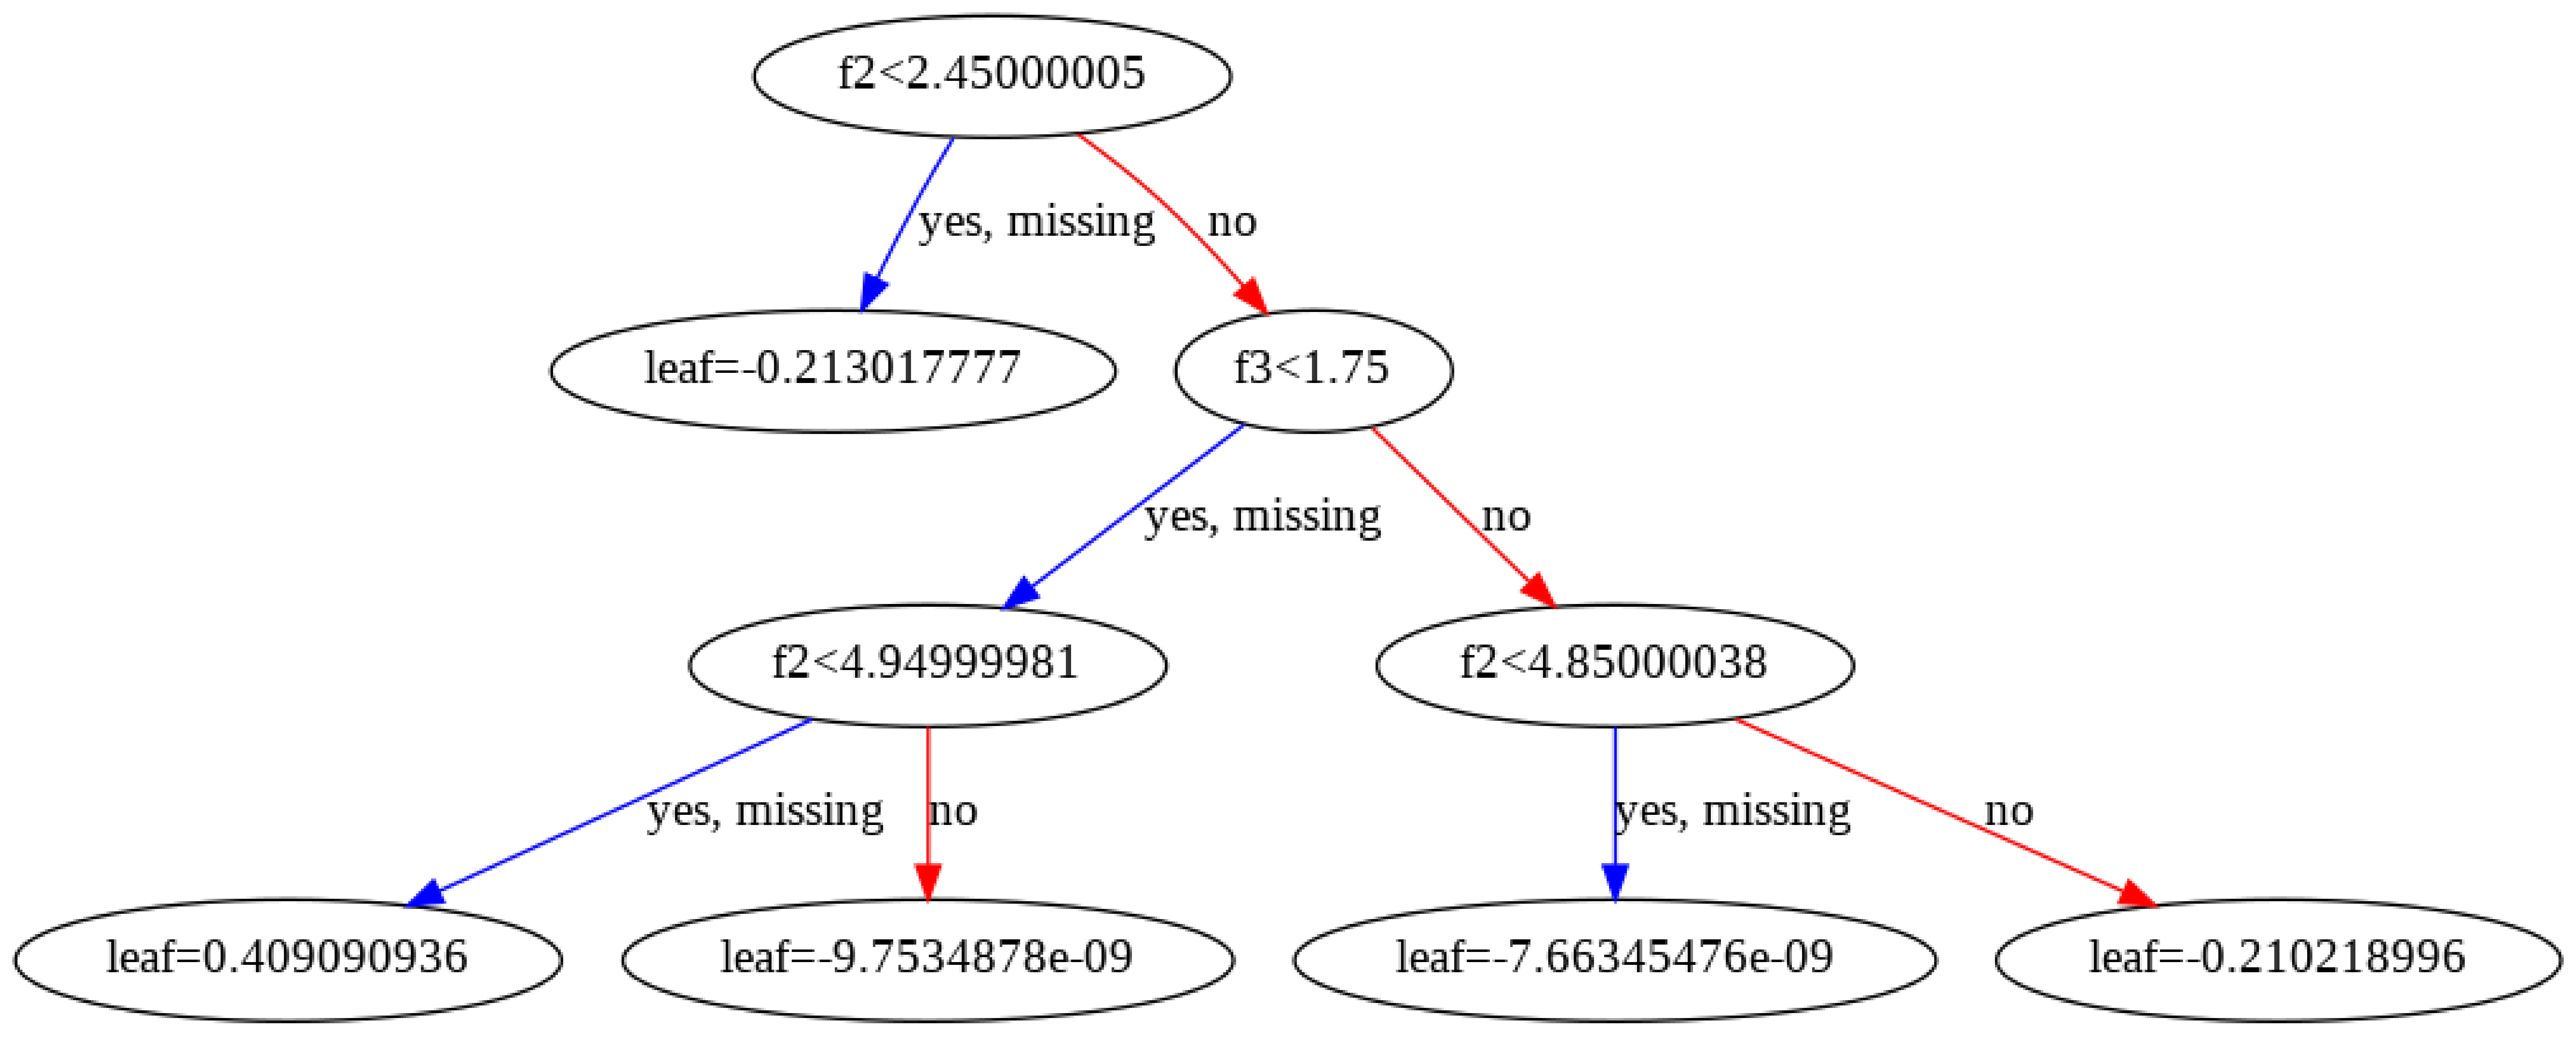

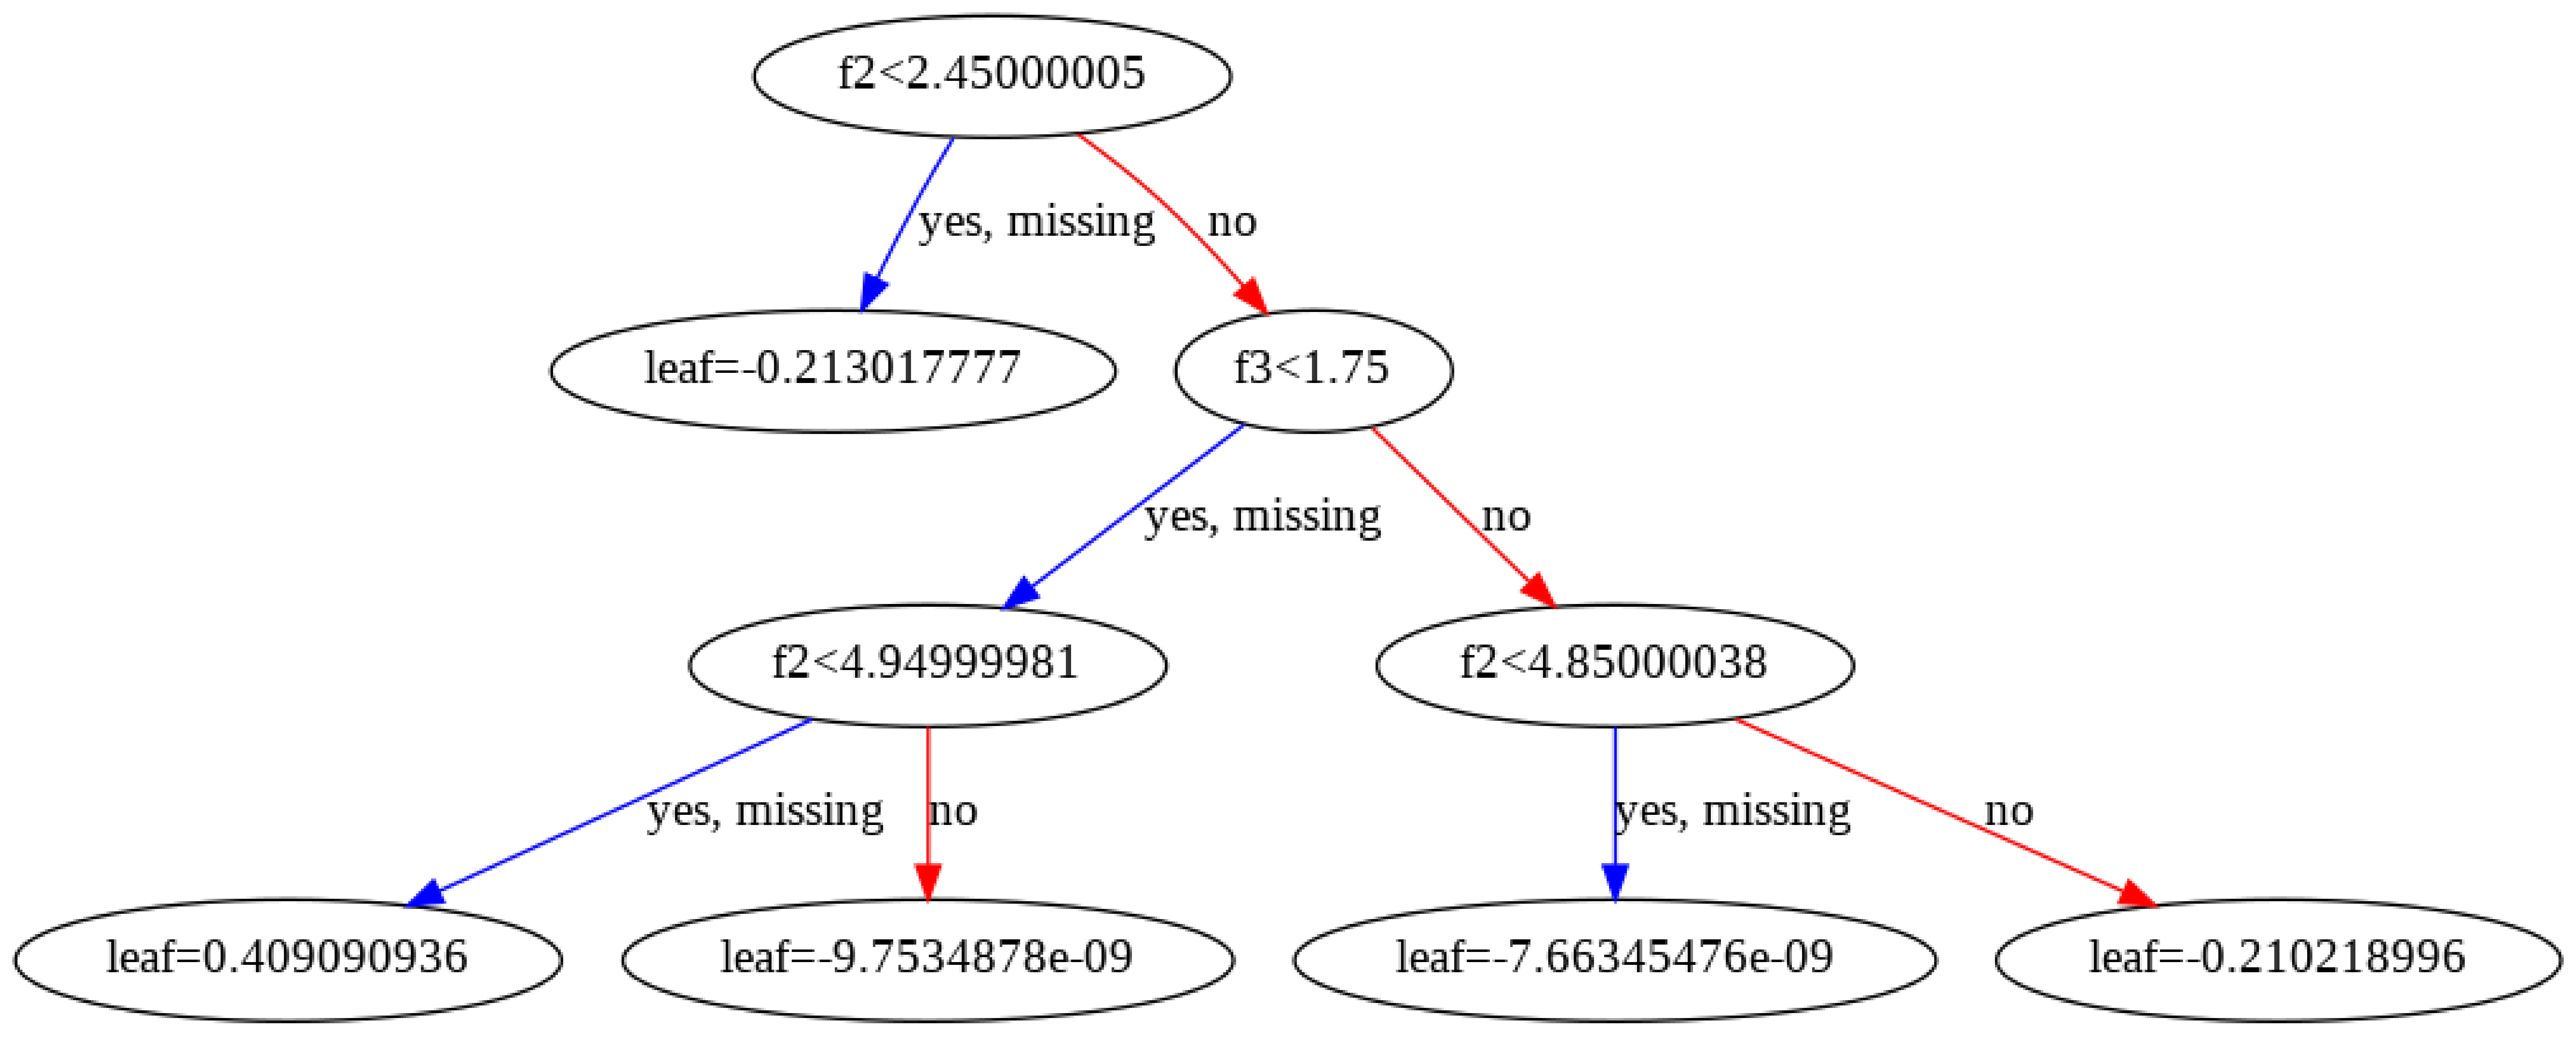

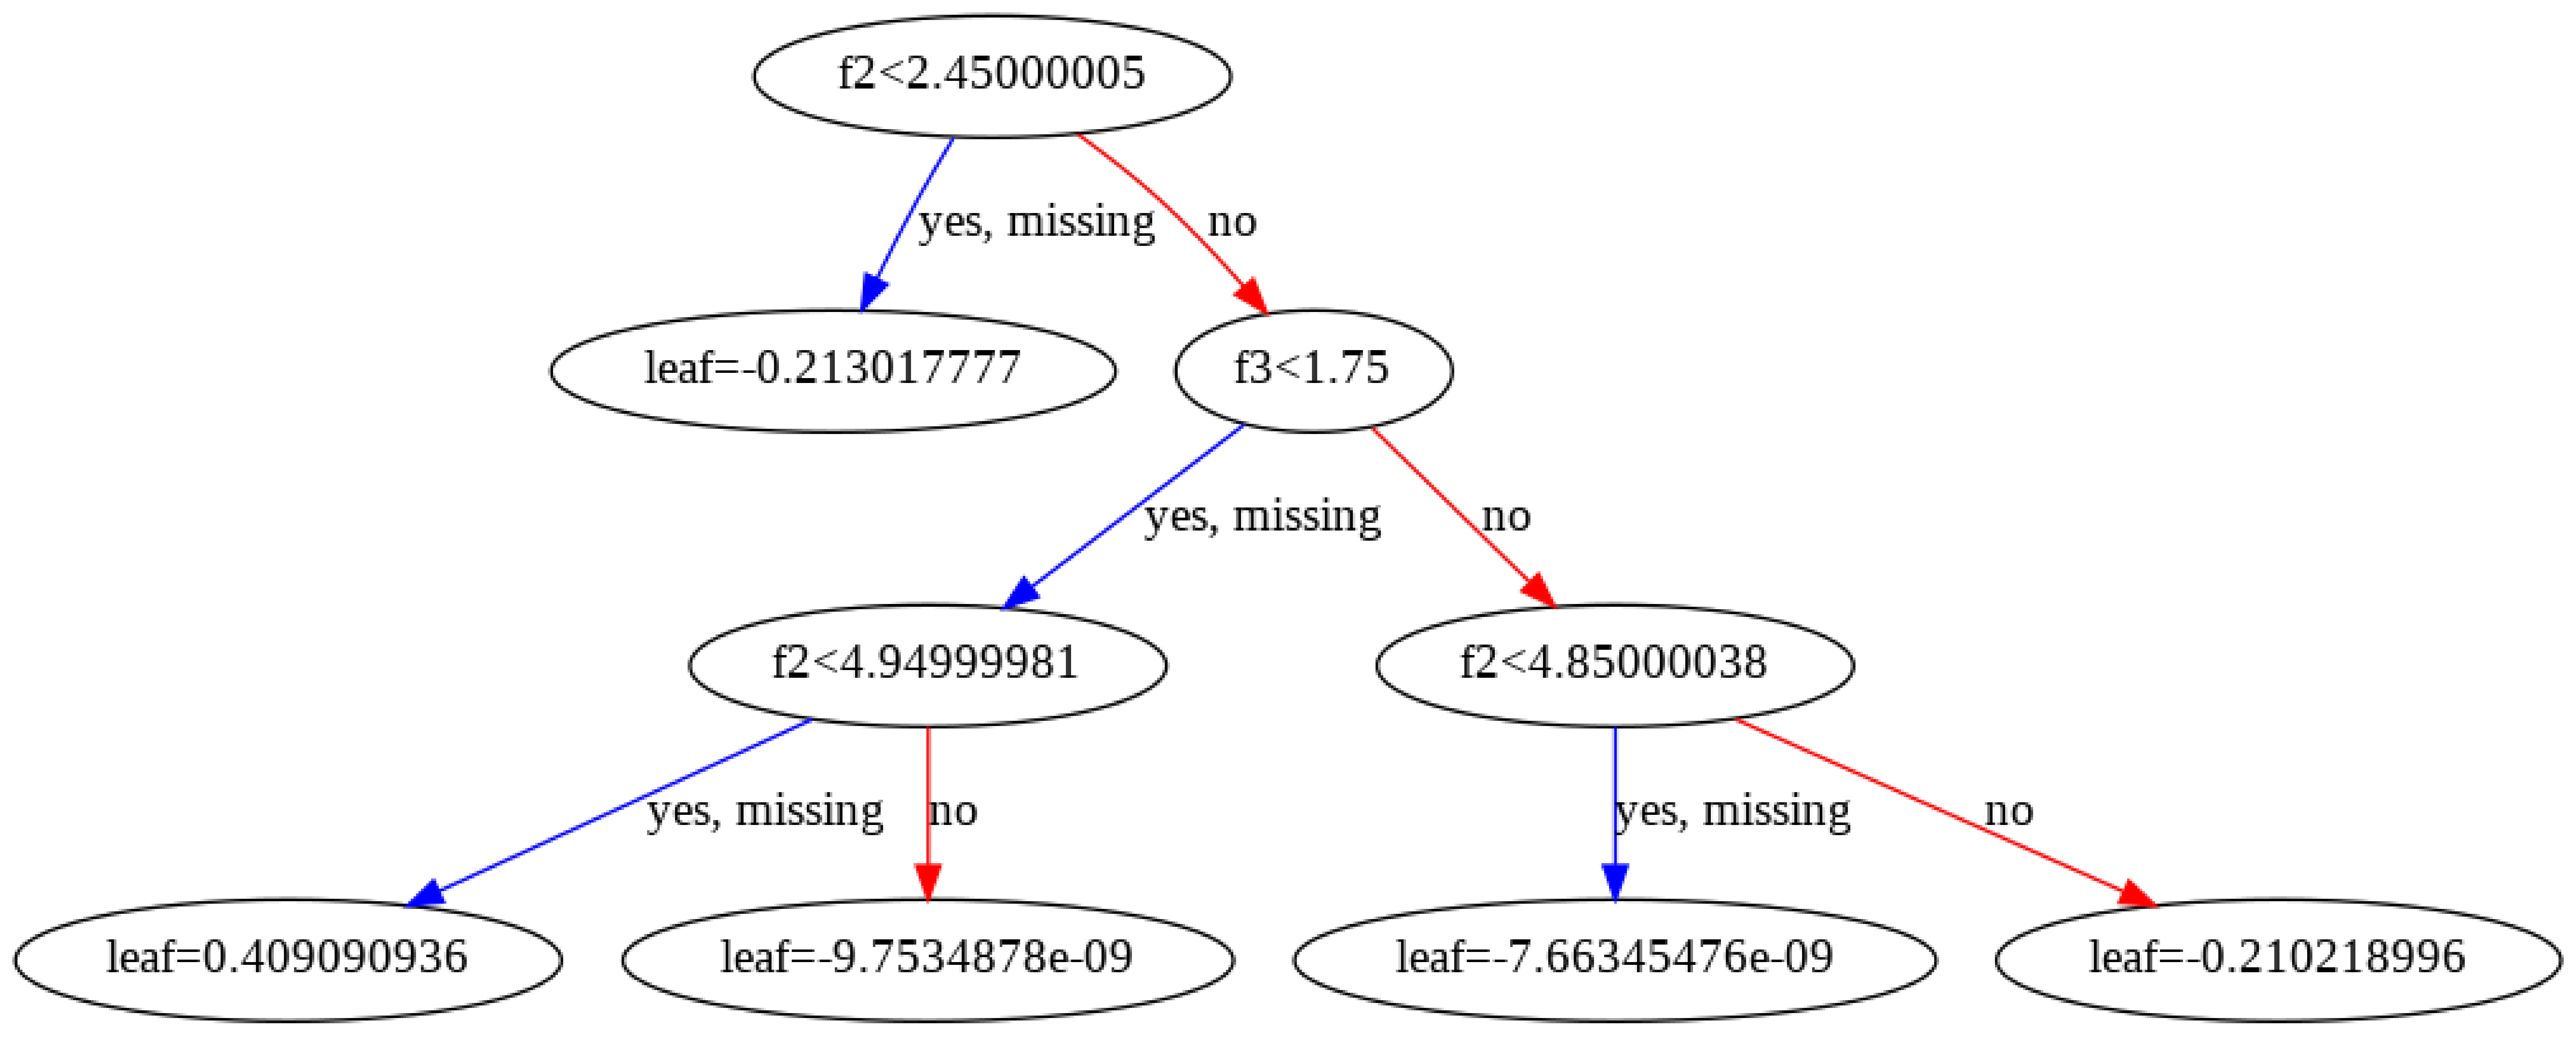

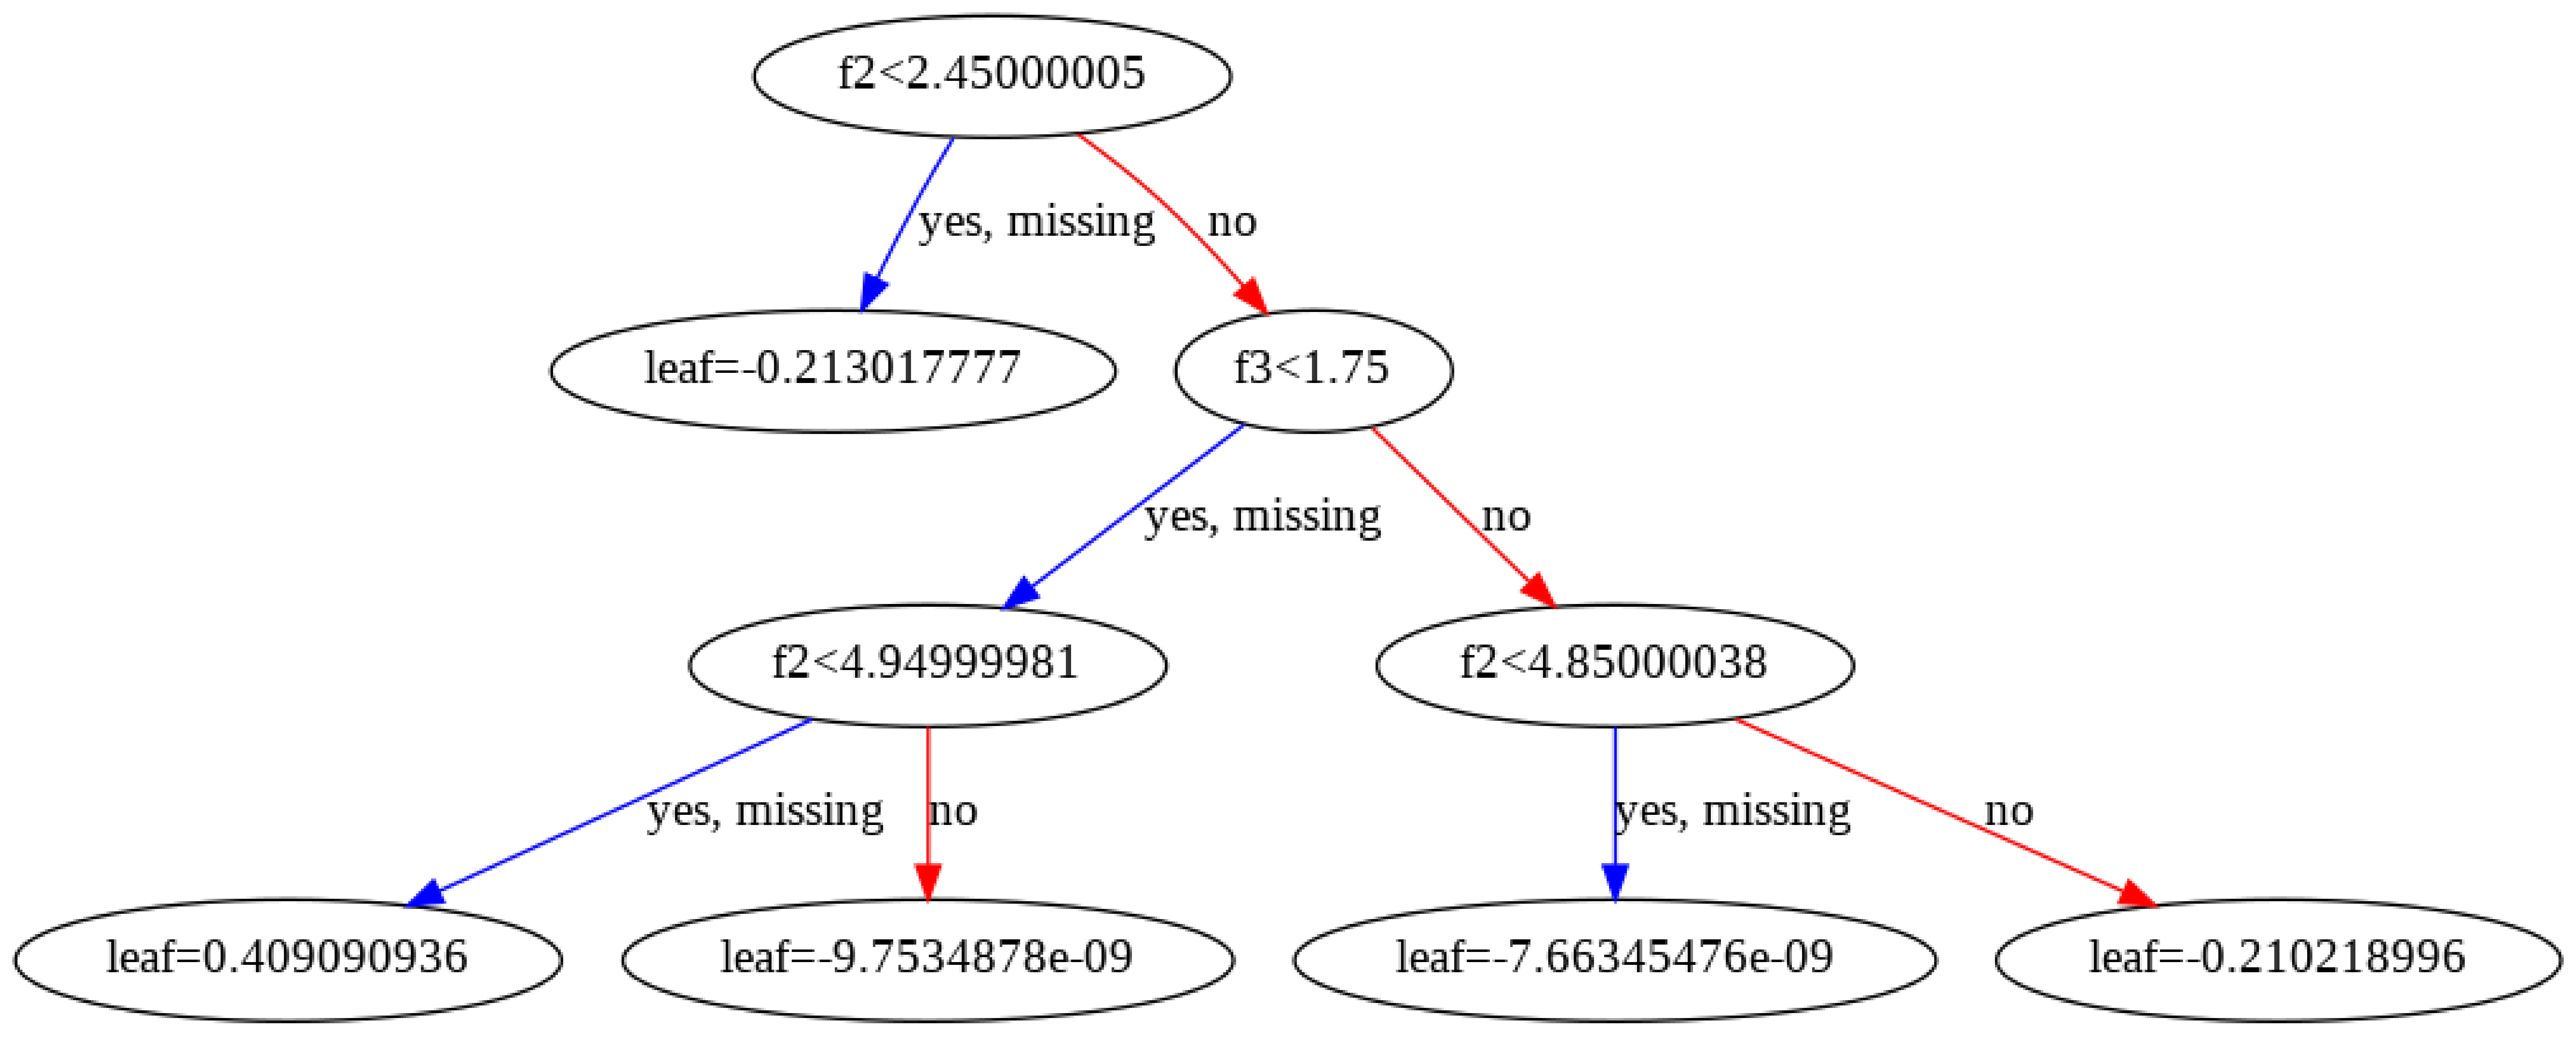

In [24]:
for i in range(5):
    xgb.plot_tree(bst,num_trees=1)
    fig = plt.gcf()
    fig.set_size_inches(150,100)
    plt.show()